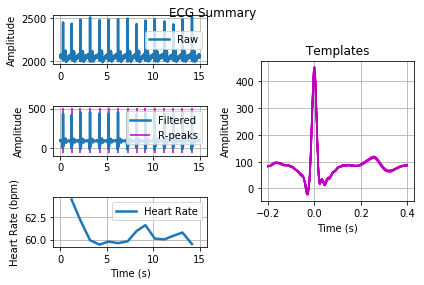

In [2]:
import numpy as np
from biosppy.signals import ecg

# load raw ECG signal
signal = np.loadtxt('./ecg.txt')

# filtering and R wave detection
out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)

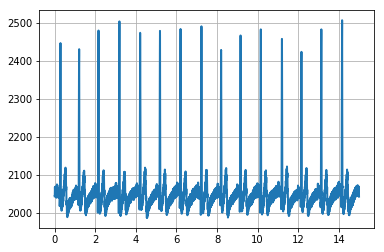

In [4]:
import numpy as np
>>> import pylab as pl
>>> from biosppy import storage
>>>
>>> signal, mdata = storage.load_txt('./ecg.txt')
>>> Fs = mdata['sampling_rate']
>>> N = len(signal)  # number of samples
>>> T = (N - 1) / Fs  # duration
>>> ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
>>> pl.plot(ts, signal, lw=2)
>>> pl.grid()
>>> pl.show()

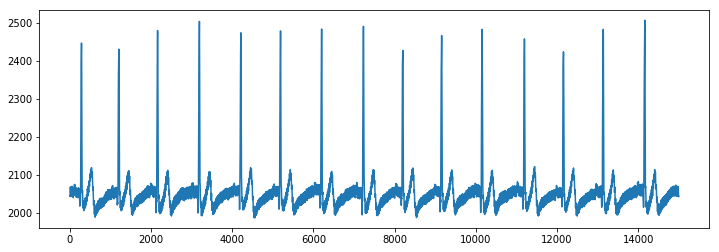

In [14]:
import heartpy as hp
import matplotlib.pyplot as plt

sample_rate = 1000
data = hp.get_data('ecg.txt')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

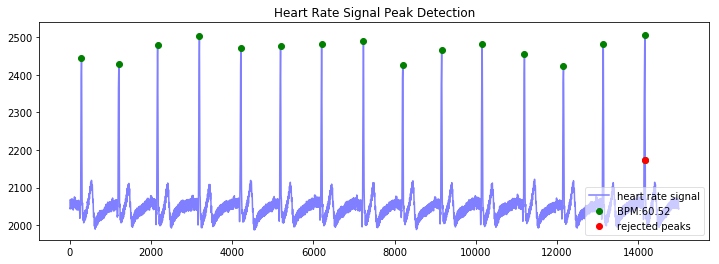

bpm: 60.523092
ibi: 991.357143
sdnn: 35.007361
sdsd: 22.039770
rmssd: 45.064910
pnn20: 0.692308
pnn50: 0.230769
hr_mad: 31.000000
sd1: 31.369340
sd2: 33.923164
s: 3343.117263
sd1/sd2: 0.924717
breathingrate: 0.288268


In [8]:
wd, m = hp.process(data, sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

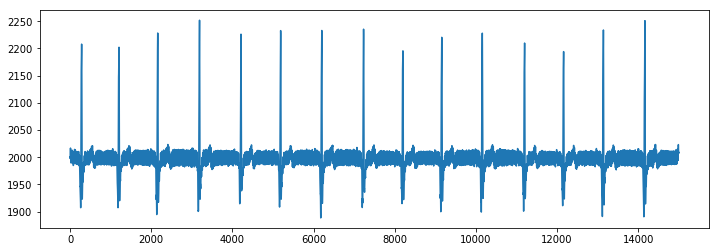

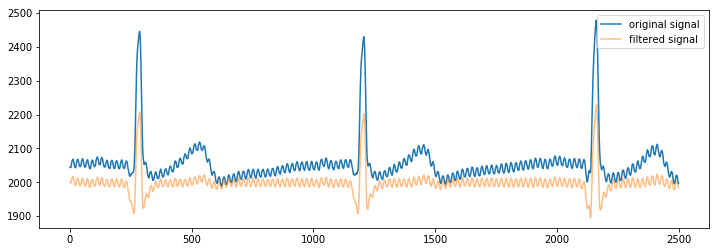

In [9]:
filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

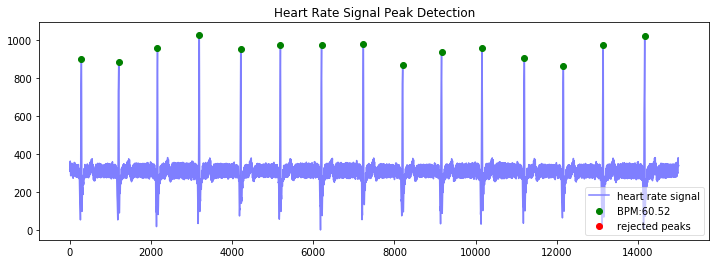

bpm: 60.518732
ibi: 991.428571
sdnn: 35.054477
sdsd: 21.861858
rmssd: 45.179982
pnn20: 0.692308
pnn50: 0.230769
hr_mad: 32.500000
sd1: 31.461632
sd2: 34.108251
s: 3371.247022
sd1/sd2: 0.922405
breathingrate: 0.288205


In [10]:
wd, m = hp.process(hp.scale_data(filtered), sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))